# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, classification_report

# Dataset

In [ ]:
digits = load_digits()
X = pd.DataFrame(digits.data,columns=digits.feature_names)
y = pd.DataFrame(digits.target,columns=['target'])
df = pd.concat([X,y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

# EDA

In [ ]:
np.asarray(X.iloc[0]).reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<AxesSubplot: >

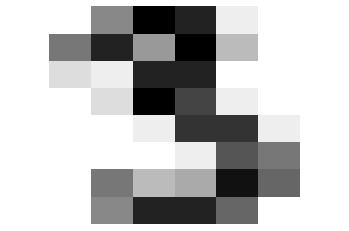

In [ ]:
sns.heatmap(np.asarray(X.iloc[3]).reshape(8,8), cmap='binary', xticklabels=False, yticklabels=False, cbar=False)

split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA

In [ ]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
pca.components_

array([[ 1.03287768e-19, -1.94234844e-01, -2.87304544e-01, ...,
        -9.43532677e-02, -1.19221157e-01, -6.65685110e-02],
       [ 1.05778204e-19,  4.19663739e-02,  5.91987849e-02, ...,
        -2.28093096e-01, -1.57258764e-01, -6.48372230e-02],
       [ 1.88487107e-18, -8.91237297e-03,  7.34322644e-02, ...,
         2.77290504e-02, -8.36388672e-02, -7.46202506e-02],
       ...,
       [-7.20889049e-18, -1.03412403e-02, -4.88122653e-03, ...,
        -2.07468301e-01, -2.23182104e-02,  1.04850804e-01],
       [-9.06107135e-18,  1.92552713e-02, -1.85879786e-01, ...,
         6.75893597e-02,  1.29258942e-01,  2.96415167e-02],
       [ 2.18532280e-17, -9.91353369e-02,  7.55945500e-02, ...,
        -2.68260132e-02,  1.36381271e-01, -4.09386183e-02]])

In [ ]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35',
       'pca36', 'pca37', 'pca38', 'pca39'], dtype=object)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9519252630320114

# Model

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)

C:\Users\hirem\AppData\Local\Temp\ipykernel_496\4230986904.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_reduced, y_train)


In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

C:\Users\hirem\AppData\Local\Temp\ipykernel_496\50261342.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



# Evaluation

model 1 (with PCA)

<AxesSubplot: >

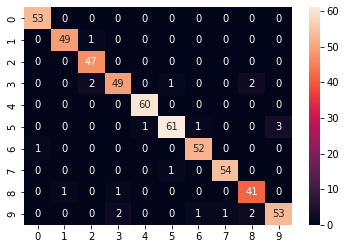

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.94      1.00      0.97        47
           3       0.94      0.91      0.92        54
           4       0.98      1.00      0.99        60
           5       0.97      0.92      0.95        66
           6       0.96      0.98      0.97        53
           7       0.98      0.98      0.98        55
           8       0.91      0.95      0.93        43
           9       0.95      0.90      0.92        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



model 2 (without PCA)

<AxesSubplot: >

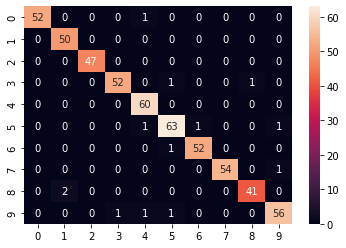

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       0.95      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.98      0.95      0.96        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# Visualization

In [ ]:
pca_df = pd.concat([pd.DataFrame(X_train_reduced), y_train], axis=1)
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1257 non-null   float64
 1   1       1257 non-null   float64
 2   2       1257 non-null   float64
 3   3       1257 non-null   float64
 4   4       1257 non-null   float64
 5   5       1257 non-null   float64
 6   6       1257 non-null   float64
 7   7       1257 non-null   float64
 8   8       1257 non-null   float64
 9   9       1257 non-null   float64
 10  10      1257 non-null   float64
 11  11      1257 non-null   float64
 12  12      1257 non-null   float64
 13  13      1257 non-null   float64
 14  14      1257 non-null   float64
 15  15      1257 non-null   float64
 16  16      1257 non-null   float64
 17  17      1257 non-null   float64
 18  18      1257 non-null   float64
 19  19      1257 non-null   float64
 20  20      1257 non-null   float64
 21  21      1257 non-null   float64
 22  

In [ ]:
px.scatter_3d(data_frame=pca_df, x=0, y=1, z=2, color='target')

In [ ]:
pca_df_3 = pca_df[pca_df['target']==3]
pca_df_3

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,target
3,4.961509,-0.369984,-1.315694,0.881950,-0.602940,-0.499031,1.495193,0.661227,-0.419633,0.269076,...,0.254984,-0.255067,0.113578,-0.160156,-0.513169,0.071702,0.433885,-0.031173,-0.443375,3.0
13,2.441961,-4.118409,-0.802779,-0.553958,-0.089991,-0.149553,0.551737,-1.908972,0.717179,-0.701874,...,-0.025960,-0.318102,-0.212501,0.325321,0.286125,-0.015550,0.595669,-0.468531,0.729880,3.0
45,1.196718,-0.227210,-0.990094,-1.953697,-1.601271,-0.072804,0.360833,-1.325909,0.844802,-0.819735,...,0.466991,0.300497,-0.467547,0.439914,-0.003412,-0.022627,-0.183166,0.532311,0.157296,3.0
60,-3.391626,-1.325368,-2.500365,0.872164,-0.043128,0.226902,-1.123289,-0.030524,2.113123,-1.457843,...,-0.513805,-0.249644,0.572471,-0.261717,0.001889,0.549305,-0.527994,-0.597938,-0.136045,3.0
62,-0.067214,0.058839,-4.648928,-0.279230,-1.235441,-0.333768,-0.799271,-0.233790,1.933230,-1.362409,...,-0.198932,-0.745867,-0.012088,-0.017158,-0.087527,0.054526,0.053897,0.046683,-0.874977,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
px.scatter_3d(data_frame=pca_df_3, x=0, y=1, z=2, color='target')

<AxesSubplot: >

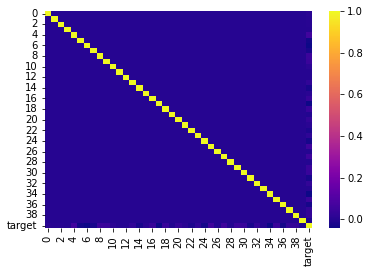

In [ ]:
plt.Figure(figsize=(15,10))
sns.heatmap(pca_df.corr(), cmap='plasma', annot=False)